# Laboratorio 1

**Andres Chaparro - 202111146**

#

In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

# 1. Carga de datos (csv)

In [2]:
# Cargar los datos de los archivos CSV
direccionValidation = r'C:\Users\andre\OneDrive - Universidad de los andes\Escritorio\universidad\Semestre 9\Inteligencia de negocios\Lab 1\validation_data.csv'
direccionTrain = r'C:\Users\andre\OneDrive - Universidad de los andes\Escritorio\universidad\Semestre 9\Inteligencia de negocios\Lab 1\train_data.csv'
validation_data = pd.read_csv(direccionValidation)
train_data = pd.read_csv(direccionTrain)

print(validation_data.shape)
print(train_data.shape)

(1000, 17)
(4000, 18)


In [3]:
validation_data.head()

,ra,colv,i,rowv,class,dec,score,camcol,field,clean,r,z,g,run,objid,u,mjd
0,190.129408,0.000187,17.04507,0.000731,STAR,0.740488,0.822898,5,496,1,17.23757,16.98653,17.72796,756,1237648722308890798,18.84865,54567
1,126.739160,-0.001844,17.87246,-0.000979,STAR,-0.982894,0.868712,1,73,1,17.96179,17.83893,18.27308,756,1237648720133685722,19.34957,53083
2,162.692083,-0.004810,16.20404,-0.004358,GALAXY,1.068587,0.830950,6,313,0,16.55942,15.94029,17.21567,756,1237648722833768573,18.64485,51909
3,190.181702,-0.012342,17.48020,-0.002584,GALAXY,0.797830,0.833386,5,497,0,17.69294,17.30092,18.12268,756,1237648722308956300,19.25978,51941
4,225.414989,-0.000250,17.81908,-0.000397,STAR,0.878768,0.881142,6,547,1,17.89974,17.79936,18.12826,752,1237648705669234734,19.39298,51990


In [4]:
train_data.head()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
0,1237648722306924571,185.574486,0.701402,19.11034,17.62099,17.03464,16.82993,16.71711,756,5,466,0.864145,1,STAR,8.780529e-05,54140,0.002418,0.001363
1,1237648720167436418,203.801841,-0.853906,18.90957,17.62940,17.01465,16.62059,16.35239,756,1,588,0.816541,1,GALAXY,8.619995e-02,51955,0.008650,0.007056
2,1237648720685105352,160.034264,-0.421626,19.26340,17.67693,16.82551,16.42307,16.13864,756,2,295,0.870381,1,GALAXY,1.330486e-01,51913,0.003938,-0.002028
3,1237648703510937836,200.807373,-0.682024,18.82022,17.77765,17.38575,17.11128,16.93540,752,2,382,0.867801,1,GALAXY,8.636355e-02,51959,0.001839,0.001160
4,1237648720161275992,189.792404,-1.001480,18.91391,19.05355,19.46278,19.75660,20.09613,756,1,494,0.833824,1,STAR,-4.090000e-08,54562,0.001929,-0.000465


# 2. Entendimientos de los datos

El análisis realizado muestra que no hay valores nulos en ninguna de las columnas del DataFrame validation_data. Esto es evidente ya que la proporción de valores nulos para todas las columnas (ra, colv, i, rowv, class, dec, score, camcol, field, clean, r, z, g, run, objid, u, mjd) es igual a 0.

In [5]:
features = ["objid", "ra", "dec", "u", "g", "r", "i", "z", "run", "camcol", "field", "score", "clean", "class", "redshift", "mjd", "rowv", "colv"]
train_data[features].isnull().sum() / train_data.shape[0]


objid       0.0
ra          0.0
dec         0.0
u           0.0
g           0.0
r           0.0
i           0.0
z           0.0
run         0.0
camcol      0.0
field       0.0
score       0.0
clean       0.0
class       0.0
redshift    0.0
mjd         0.0
rowv        0.0
colv        0.0
dtype: float64

### 2.1. Búsqueda de relaciones con la variable objetivo

#### Relaciones entre las Magnitudes con la variable objetivo Redshift
Se puede observar que las magnitudes se distribuyen de forma aleatoria respecto al redshift y todas tienen una distribución algo similar pero esto se puede deber a datos atipicos que pueden estar afectando como se pueden notar hay datos que estan muy por encima de los demas, lo que puede indicar presencia de outliers

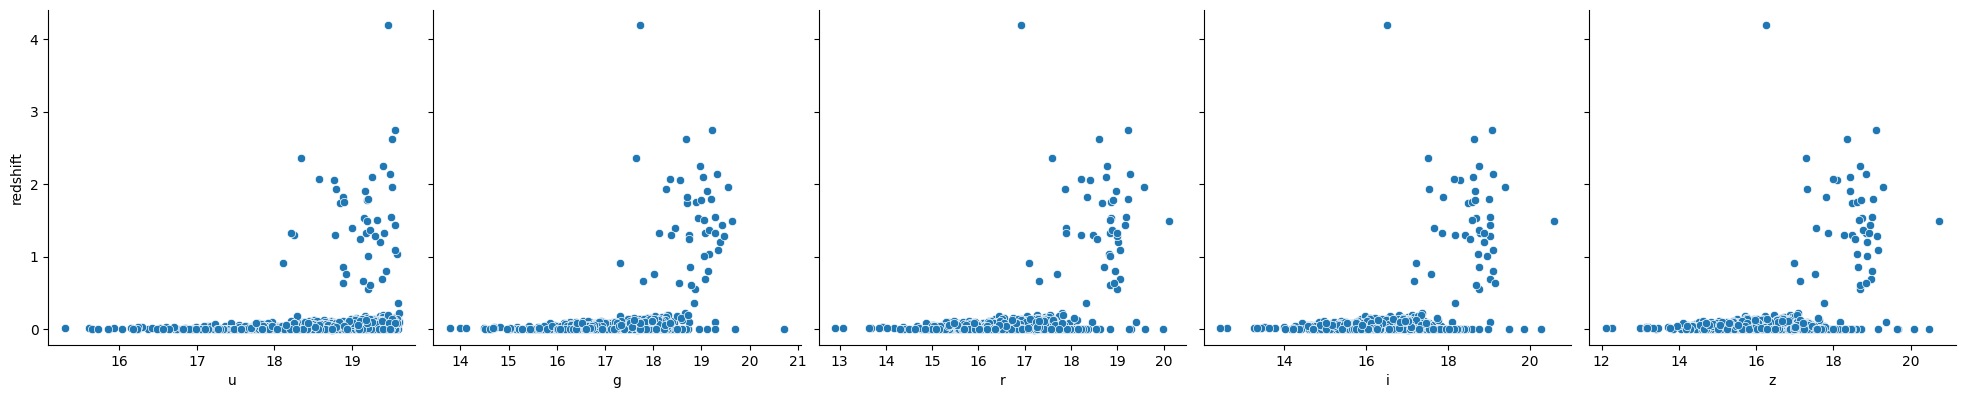

In [6]:

magnitude_features = ["u", "g", "r", "i", "z"]
sns.pairplot(train_data.sample(frac=0.2), height=4, y_vars="redshift", x_vars=magnitude_features, kind="scatter")


#### Relaciones de otros atributos como la ubicación, velocidad y valor de calidad con el valor objetivo Redshift

En este caso se puede observar como la ubicación en ascenso y declinacion tiene una distribucion aleatoria pero con algunos valores atipicos que salen del rango comun de los datos, lo que se puede observar mas en la ubicacion de declinación.  Por otro lado en las velocidades se puede observar también una distribucion similar en ambas donde se centran los datos en cero. Por ultimo, en el valor de calidad de la observación se puede observar tambien una distribución aleatoria donde normalmente se tiene una gran calidad de las fotos, pero hay otra pequeña cantidad de datos que obtuvieron baja calidad de datos.

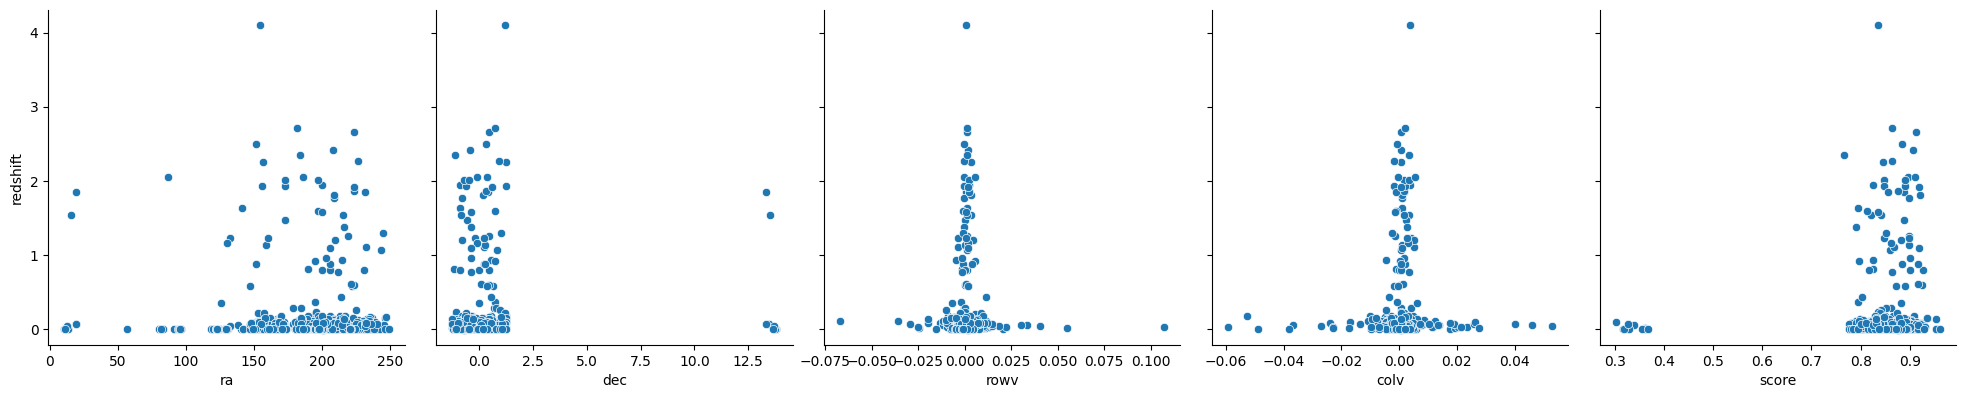

In [7]:
features = ["ra", "dec", "rowv", "colv", "score"]
sns.pairplot(train_data.sample(frac=0.2), height=4, y_vars="redshift", x_vars=features, kind="scatter")



#### Relaciones de otros atributos como el numero de observación, sección y dia juliano con el valor objetivo Redshift

Se puede observar como el numero de observación realizada por el telescopio tiene valores muy cercanos a un valores exceptuando por algunos valores que toman valores extremos, para el caso de la seccion de la columna field y camcol se puede observar una distribucion aleatoria 

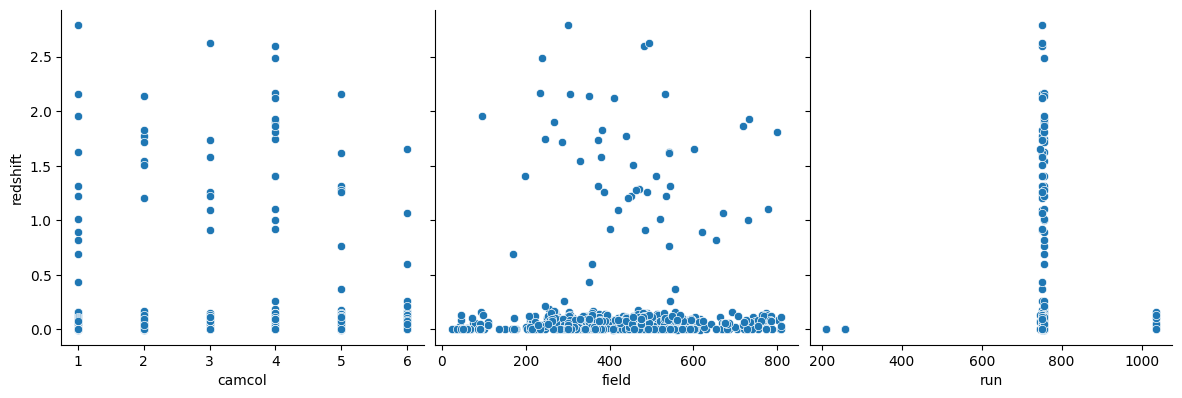

In [8]:
features = ["camcol", "field", "run"]
sns.pairplot(train_data.sample(frac=0.2), height=4, y_vars="redshift", x_vars=features, kind="scatter")


#### Relaciones de otros atributos categoricos con el valor objetivo Redshift

En los BoxPlots de abajo se observan las diferentes columnas categoricas que hay en la base de datos, para el caso de la clase del tipo registrado se deberian tener solamente Estrella (STAR) o Galaxia (GALAXY) o Cuasar (QSO) pero se puede observar que hay otras clases no identificadas como S, QUASAR y Q lo que puede indicar errores en estos datos. Para los otros datos categoricos si se ven relaciones aleatorias sin alteraciones o probables errores.


C:\Users\andre\AppData\Local\Temp\ipykernel_4484\1093796258.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train_data, x="class", y="redshift", palette="Set2")


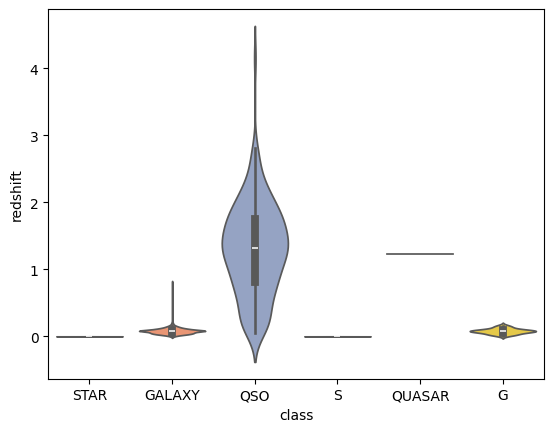

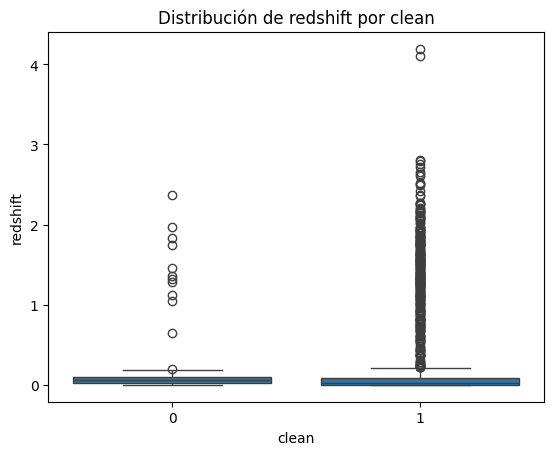

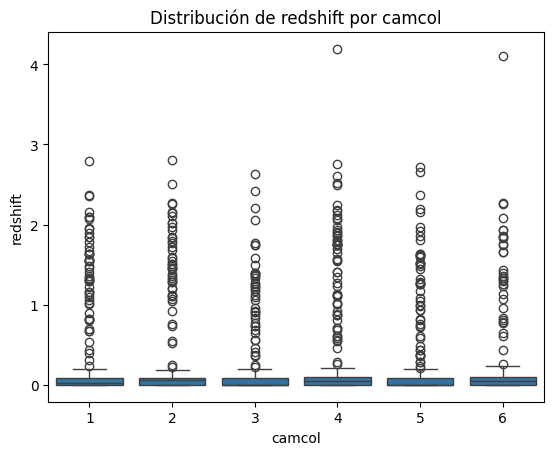

In [9]:
# Distribución de redshift por clase de objeto (class)
sns.violinplot(data=train_data, x="class", y="redshift", palette="Set2")
plt.show()

# Boxplot para cada característica categórica individualmente
for feature in ["clean", "camcol"]:
    
    sns.boxplot(data=train_data, x=feature, y="redshift")
    plt.title(f"Distribución de redshift por {feature}")
    plt.show()


### 2.2. Búsqueda de relaciones entre las variables de entrada


En la grafica de abajo se grafica las correlaciones entre las diferentes variables numericas, como se puede observar hay poca correlacion entre las diferentes variables exceptuando en las magnitudes donde estas tienen correlaciones altas que pueden variar desde 0,5 a 0,8 de correlacion entre estas

<Axes: >

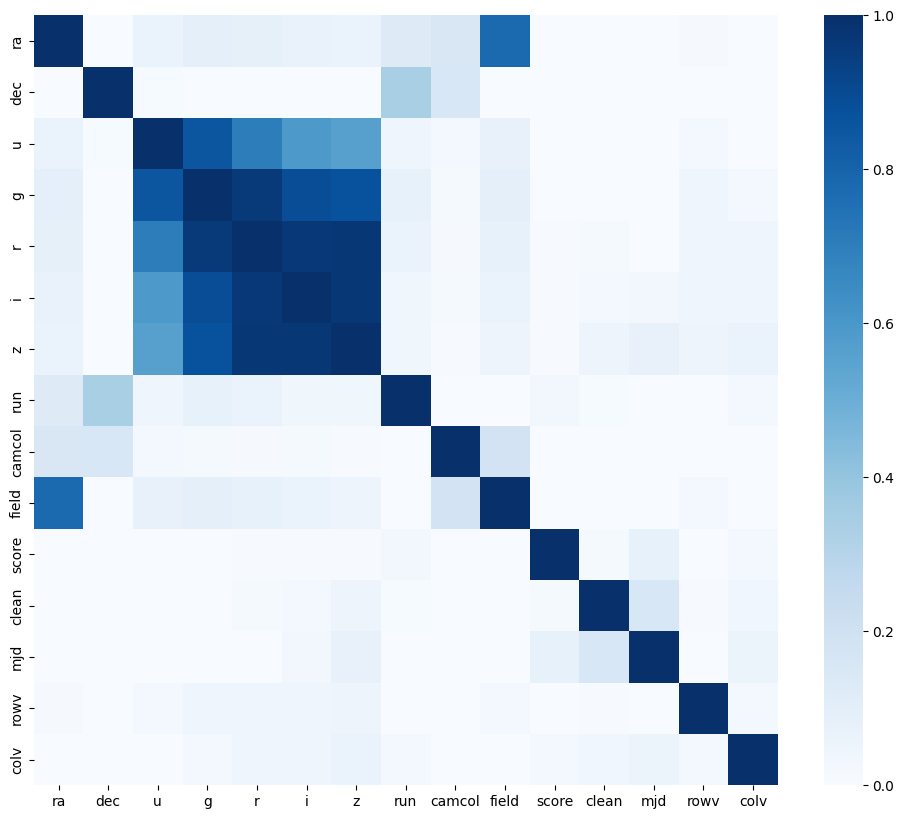

In [10]:
features = [ "ra", "dec", "u", "g", "r", "i", "z", "run", "camcol", "field", "score", "clean", "mjd", "rowv", "colv"]
plt.figure(figsize=(12, 10))
sns.heatmap(train_data[features].corr(), cmap="Blues", vmin=0, vmax=1)

### 2.3 Distribuciones individuales de las características

Aca se puede observar que la mayoria de magnitudes tienden a formar un histograma con distribucion normal exceptuando al magnitud de ultravioleta, en cuanto a las ubicaciones muestran una distribucion mas aleatoria, en cuanto al score de calidad tambien presenta una distribucion normal pero con valores extremos, por ultimo, las velocidades y redshift presentan una distribucion con menor variacion en sus datos centrandose en unos valores especificos.

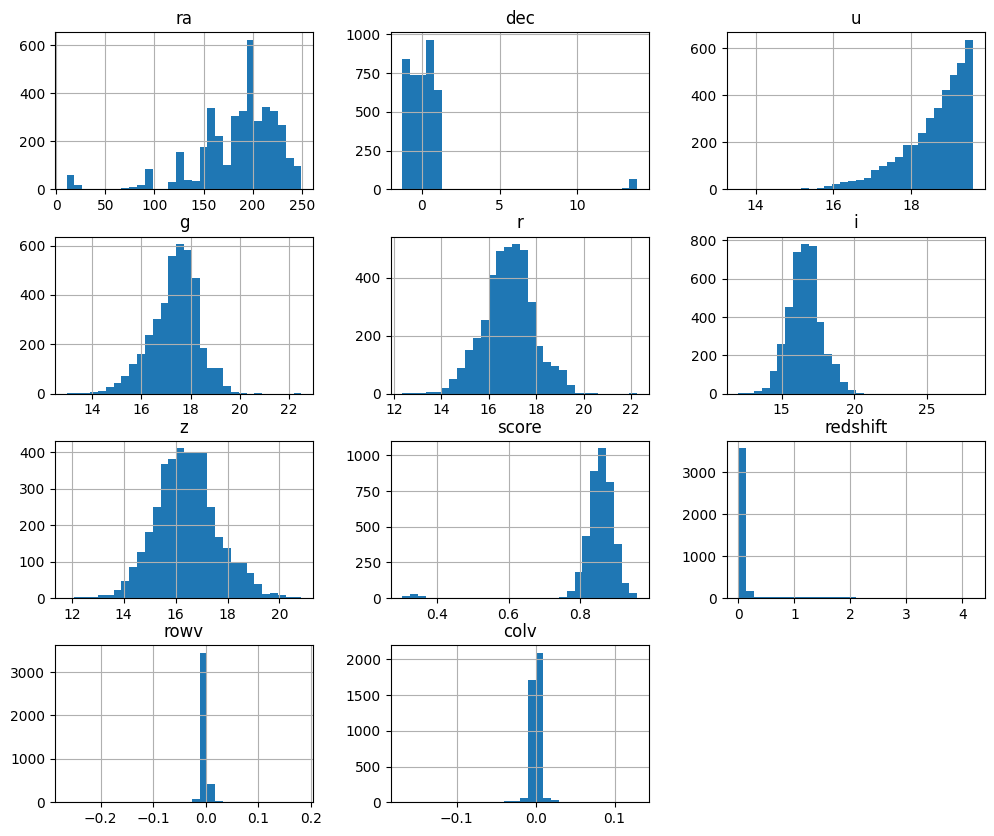

In [11]:

features = ["ra", "dec", "u", "g", "r", "i", "z", "score", "redshift", "rowv", "colv"]
train_data[features].hist(figsize=(12, 10), bins=30)
plt.show()


## 3. Preparación de datos

### 3.1. Relacionado con la calidad de los datos
Se eliminan los datos nulos de la base de datos

In [12]:
features = [ "ra", "dec", "u", "g", "r", "i", "z", "run", "camcol", "field", "score", "clean", "mjd", "rowv", "colv"]
train_data = train_data.dropna(subset=features + ["redshift"])
train_data.shape

(4000, 18)

In [19]:
features = [ "ra", "dec", "u", "g", "r", "i", "z", "run", "camcol", "field", "score", "clean", "mjd", "rowv", "colv"]
train_data.loc[train_data.duplicated(subset= features, keep=False)].head(3)

,objid,ra,dec,u,g,r,i,z,run,camcol,field,score,clean,class,redshift,mjd,rowv,colv
88,1237648703513428079,206.374167,-0.781673,18.28101,17.18856,16.70175,16.33173,16.14626,752,2,420,0.904768,1,GALAXY,0.088136,51943,-0.002860,0.001156
109,1237648721231609897,182.015940,-0.116600,17.96686,16.91550,16.75447,16.68648,16.70880,756,3,442,0.876962,1,S,-0.000066,51615,-0.000639,0.000270
114,1237646382079606869,94.679499,0.842321,18.47695,16.94897,16.68126,16.59887,16.51747,211,6,359,0.806204,1,STAR,0.000207,52931,0.000372,-0.001017


In [20]:

duplicated_rows = train_data.loc[train_data.duplicated(subset=features, keep=False)].shape[0]
duplicated_rows

34

In [21]:
print(f"Duplicates: {(duplicated_rows/train_data.shape[0])*100:.4f}%")

Duplicates: 0.8500%
